In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

C:\Users\subhr\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMAGE_PATH = 'test.jpg'
from skimage import color
from skimage import io

# img = color.rgb2gray(io.imread(IMAGE_PATH))
# figure(figsize=(16, 16), dpi=80)
# thsr = 0.8
# img[img>thsr] = 255
# img[img<=thsr] = 0
# #img = color.gray2rgb(img)
# img = img.astype('float32')
# plt.imshow(img)
# img

In [3]:
img = IMAGE_PATH
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(img,min_size = 10,text_threshold = 0.1)
result
#IMAGE_PATH = 'surf.jpeg'

[([[424, 16], [430, 16], [430, 30], [424, 30]], '3', 0.2271662442954181),
 ([[15, 43], [27, 43], [27, 61], [15, 61]], '3', 0.999988794358174),
 ([[41, 43], [115, 43], [115, 61], [41, 61]], 'assume', 0.8440125967601738),
 ([[461, 41], [509, 41], [509, 61], [461, 61]], '6100', 0.9998574256896973),
 ([[16, 74], [24, 74], [24, 86], [16, 86]], '4', 0.9938521990066285),
 ([[40, 68], [110, 68], [110, 92], [40, 92]], 'stables', 0.9999897270151656),
 ([[470, 68], [508, 68], [508, 92], [470, 92]], '565', 0.9999987611408254),
 ([[15, 99], [27, 99], [27, 119], [15, 119]], '5', 0.9999908209057686),
 ([[39, 96], [206, 96], [206, 122], [39, 122]],
  'percent in stables',
  0.9999290277066823),
 ([[451, 99], [507, 99], [507, 119], [451, 119]], '9.26%', 0.6652442483018006),
 ([[668, 97], [776, 97], [776, 125], [668, 125]],
  'final target',
  0.8815812807734882),
 ([[975, 99], [1027, 99], [1027, 119], [975, 119]], '100%', 0.99825315827233),
 ([[16, 130], [24, 130], [24, 144], [16, 144]], '6', 0.9683684

In [4]:
import numpy as np
img = cv2.imread(IMAGE_PATH)
font = cv2.FONT_HERSHEY_SIMPLEX
import pandas as pd
spacer = 100

#vals = np.zeros((len(result),3))
vals = []
prev_y1,prev_y2 = 0,0
counter = 1
x_list = list()
y_list = list()
for i,detection in enumerate(result): 
    y1,y2 = detection[0][0][1],detection[0][2][1]
    x1,x2 = detection[0][0][0],detection[0][2][0]
    x_centroid = (x1+x2)/2
    y_centroid = (y1+y2)/2
    x_list.append(x_centroid)
    vals.append((detection[1],counter,x_centroid,y_centroid))
    if abs(prev_y1-y1) + abs(prev_y2-y2) > 20:
        #print('changed')
        counter += 1
    #print(y1,y2,detection[1])
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    
    #img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
    prev_y1,prev_y2 = y1,y2
    

In [5]:
df = pd.DataFrame(vals,columns = ['value','y','x_mean','y_mean'])
df

,value,y,x_mean,y_mean
0,3,1,427.0,23.0
1,3,2,21.0,52.0
2,assume,3,78.0,52.0
3,6100,3,485.0,51.0
4,4,3,20.0,80.0
...,...,...,...,...
65,21,22,19.0,572.0
66,87%,23,321.0,574.0
67,73000,23,479.0,572.0
68,22,23,20.0,603.0


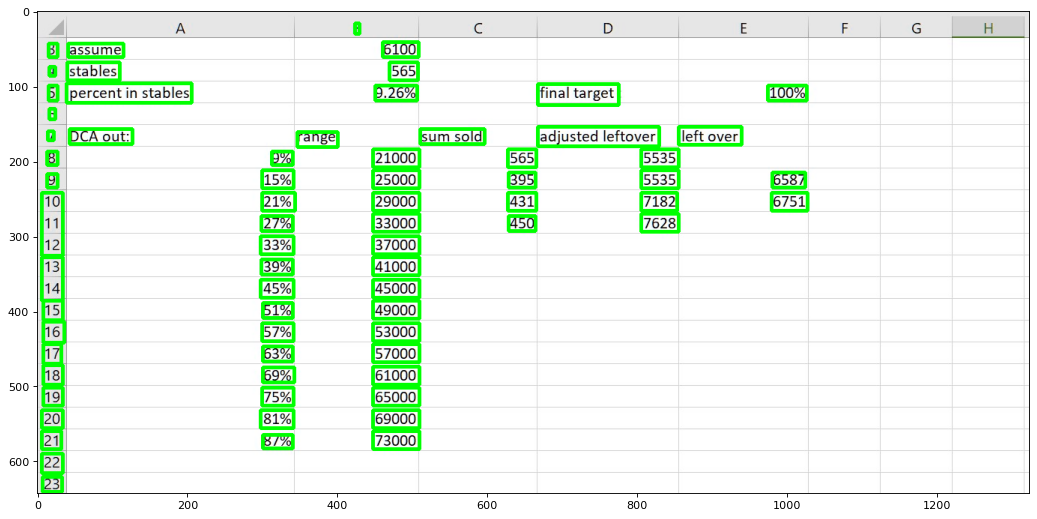

In [6]:
figure(figsize=(16, 16), dpi=80)
plt.imshow(img)
plt.show()

In [7]:
#please enter rows and columns
# def col2num(col):
#     num = 0
#     for c in col:
#         if c in string.ascii_letters:
#             num = num * 26 + (ord(c.upper()) - ord('A')) + 1
#     return num
# n = 'h'
# m = 20


In [8]:
#height, width, channels = img.shape

In [9]:
#height

643

In [10]:
#width

1324

In [11]:
print(x_list)

[427.0, 21.0, 78.0, 485.0, 20.0, 75.0, 489.0, 21.0, 122.5, 479.0, 722.0, 1001.0, 20.0, 18.0, 85.0, 374.0, 554.0, 749.0, 898.0, 20.0, 327.0, 479.0, 647.0, 831.0, 20.0, 321.0, 479.0, 647.0, 831.0, 1003.0, 322.0, 479.0, 647.0, 830.0, 1004.0, 20.0, 320.0, 479.0, 647.0, 831.0, 320.0, 479.0, 320.0, 479.0, 20.0, 320.0, 479.0, 21.0, 321.0, 479.0, 22.0, 321.0, 479.0, 20.0, 321.0, 479.0, 21.0, 322.0, 479.0, 21.0, 321.0, 479.0, 20.0, 320.0, 479.0, 19.0, 321.0, 479.0, 20.0, 20.0]


In [15]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
K=range(1,20)
wss = []
arr = np.array(df['x_mean'])
arr_y = np.array(df['y_mean'])
scaled_data = mms.fit_transform(arr.reshape(-1,1))
scaled_data_y = mms.fit_transform(arr_y.reshape(-1,1))
# prev = 0
# diff = []
# for k in K:
#     kmeans=cluster.KMeans(n_clusters=k)
#     kmeans=kmeans.fit(scaled_data)
#     wss_iter = kmeans.inertia_
#     wss.append(wss_iter)
#     delta  = abs(wss_iter - prev)
#     prev  = wss_iter
#     diff.append(delta)
    
# plt.xlabel('K')
# plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
# plt.plot(K,wss)

In [13]:
# plt.xlabel('K')
# plt.ylabel('delta')
# plt.plot(K,diff)

In [10]:
arr

array([ 427. ,   21. ,   78. ,  485. ,   20. ,   75. ,  489. ,   21. ,
        122.5,  479. ,  722. , 1001. ,   20. ,   18. ,   85. ,  374. ,
        554. ,  749. ,  898. ,   20. ,  327. ,  479. ,  647. ,  831. ,
         20. ,  321. ,  479. ,  647. ,  831. , 1003. ,  322. ,  479. ,
        647. ,  830. , 1004. ,   20. ,  320. ,  479. ,  647. ,  831. ,
        320. ,  479. ,  320. ,  479. ,   20. ,  320. ,  479. ,   21. ,
        321. ,  479. ,   22. ,  321. ,  479. ,   20. ,  321. ,  479. ,
         21. ,  322. ,  479. ,   21. ,  321. ,  479. ,   20. ,  320. ,
        479. ,   19. ,  321. ,  479. ,   20. ,   20. ])

In [14]:
#greedy method
# for it,i in enumerate(diff):
#     if i <= 0.05:
#         print(it+1)
#         break

In [15]:
#inertial method
# def kMeansRes(scaled_data, k, alpha_k=0.02):
#     '''
#     Parameters 
#     ----------
#     scaled_data: matrix 
#         scaled data. rows are samples and columns are features for clustering
#     k: int
#         current k for applying KMeans
#     alpha_k: float
#         manually tuned factor that gives penalty to the number of clusters
#     Returns 
#     -------
#     scaled_inertia: float
#         scaled inertia value for current k           
#     '''
    
#     inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
#     # fit k-means
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
#     scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
#     return scaled_inertia
# def chooseBestKforKMeans(scaled_data, k_range):
#     ans = []
#     for k in k_range:
#         scaled_inertia = kMeansRes(scaled_data, k)
#         ans.append((k, scaled_inertia))
#     results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
#     best_k = results.idxmin()[0]
#     return best_k, results
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# scaled_data = mms.fit_transform(arr.reshape(-1,1))
# # choose k range
# k_range=range(2,20)
# # compute adjusted intertia
# best_k, results = chooseBestKforKMeans(scaled_data, k_range)
# print(best_k)

In [42]:
import sklearn.metrics as metrics
index_maxx = []
index_maxx_y = []
for i in range(2,20):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data).labels_
    index_maxx.append((i,metrics.silhouette_score(scaled_data,labels,metric="euclidean",random_state=200))) #sample 
for i in range(2,40):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data_y).labels_
    index_maxx_y.append((i,metrics.silhouette_score(scaled_data_y,labels,metric="euclidean",random_state=200)))
    #print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(scaled_data,labels,metric="euclidean",sample_size=1000,random_state=200)))

C:\Users\subhr\AppData\Local\Temp\ipykernel_6684\909072882.py:8: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data_y).labels_
C:\Users\subhr\AppData\Local\Temp\ipykernel_6684\909072882.py:8: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data_y).labels_
C:\Users\subhr\AppData\Local\Temp\ipykernel_6684\909072882.py:8: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data_y).labels_


In [43]:
#index_maxx.sort(key = lambda x: x[1],reverse=True)
#index_maxx_y.sort(key = lambda x: x[1],reverse=True)
x_optimal = max(index_maxx,key=lambda item:item[1])[0]
y_optimal = max(index_maxx_y,key=lambda item:item[1])[0]
print(x_optimal,y_optimal)

8 21


In [44]:
index_maxx_y

[(2, 0.6449044556548373),
 (3, 0.5571449746115446),
 (4, 0.5627228835013687),
 (5, 0.5669682142847411),
 (6, 0.5784888770661821),
 (7, 0.5675046654153334),
 (8, 0.5722488493984071),
 (9, 0.6070331278294839),
 (10, 0.6085529675838482),
 (11, 0.6197096257362659),
 (12, 0.6921156760820701),
 (13, 0.7051130900502647),
 (14, 0.7392183391808903),
 (15, 0.771885190937299),
 (16, 0.7900066177046666),
 (17, 0.8402367787346027),
 (18, 0.8713681995173752),
 (19, 0.8946814210828211),
 (20, 0.9061785831717519),
 (21, 0.9131872789670694),
 (22, 0.9046269657171007),
 (23, 0.9074435979696784),
 (24, 0.8893790659499895),
 (25, 0.877212660926442),
 (26, 0.8586130831643011),
 (27, 0.8460286355921491),
 (28, 0.8274290578300084),
 (29, 0.837071914972848),
 (30, 0.8237890156062093),
 (31, 0.8309374611913768),
 (32, 0.8176545618247383),
 (33, 0.8247974189675954),
 (34, 0.8115321128451464),
 (35, 0.7982668067226811),
 (36, 0.7714285714285715),
 (37, 0.7714285714285715),
 (38, 0.7714285714285715),
 (39, 0.7714

In [18]:
kmeans = cluster.KMeans(n_clusters=x_optimal,init="k-means++")
kmeans_y = cluster.KMeans(n_clusters=y_optimal,init="k-means++")
kmeans = kmeans.fit(df[['x_mean']])
kmeans_y = kmeans_y.fit(df[['y_mean']])

In [19]:
df['Clusters'] = kmeans.labels_
df['Clusters_y'] = kmeans_y.labels_

In [20]:
df.sort_values(by=['x_mean'], ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)
counter = 1
df['x'] = counter
for i in range(2,len(df)):
    #print(df['Clusters'][i-1])
    if df['Clusters'][i-1] != df['Clusters'][i]:
        counter += 1
    df['x'][i] = counter
df.sort_values(by=['y_mean'], ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)
counter = 1
df['y_c'] = counter
for i in range(2,len(df)):
    #print(df['Clusters'][i-1])
    if df['Clusters_y'][i-1] != df['Clusters_y'][i]:
        counter += 1
    df['y_c'][i] = counter

C:\Users\subhr\AppData\Local\Temp\ipykernel_6684\2159575429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = counter
C:\Users\subhr\AppData\Local\Temp\ipykernel_6684\2159575429.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_c'][i] = counter


In [21]:
df

,value,y,x_mean,y_mean,Clusters,Clusters_y,x,y_c
0,3,1,427.0,23.0,3,19,4,1
1,6100,3,485.0,51.0,3,8,4,1
2,assume,3,78.0,52.0,6,8,2,1
3,3,2,21.0,52.0,2,8,1,1
4,4,3,20.0,80.0,2,15,1,2
...,...,...,...,...,...,...,...,...
65,21,22,19.0,572.0,2,16,1,19
66,73000,23,479.0,572.0,3,16,4,19
67,87%,23,321.0,574.0,0,16,3,19
68,22,23,20.0,603.0,2,4,1,20


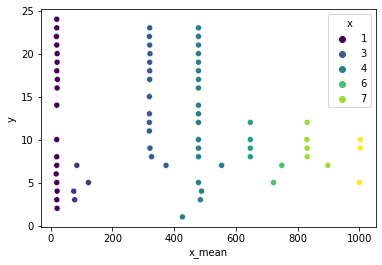

In [22]:
import seaborn as sns
sns.scatterplot(x="x_mean", y="y",hue = 'x',  data=df,palette='viridis')

In [23]:
#excel_sheet = np.zeros((df['y'].max(),df['x'].max()))
df

,value,y,x_mean,y_mean,Clusters,Clusters_y,x,y_c
0,3,1,427.0,23.0,3,19,4,1
1,6100,3,485.0,51.0,3,8,4,1
2,assume,3,78.0,52.0,6,8,2,1
3,3,2,21.0,52.0,2,8,1,1
4,4,3,20.0,80.0,2,15,1,2
...,...,...,...,...,...,...,...,...
65,21,22,19.0,572.0,2,16,1,19
66,73000,23,479.0,572.0,3,16,4,19
67,87%,23,321.0,574.0,0,16,3,19
68,22,23,20.0,603.0,2,4,1,20


In [39]:
a = [[np.nan] * df['x'].max() for i in range(df['y_c'].max())] #replaced y with y_c
for i in range(len(df)):
    x = int(df['x'][i]) - 1
    y = int(df['y_c'][i]) - 1
    #print(x,y,df['value'][i])
    if pd.isna(a[y][x]):
        a[y][x] = df['value'][i]
    else:
        a[y][x] = str(a[y][x]) +" "+ str(df['value'][i])
df_final = pd.DataFrame(a)

In [40]:
writer = pd.ExcelWriter('output.xlsx',
                        engine='xlsxwriter',
                        engine_kwargs={'options': {'strings_to_numbers': True}})
df_final.to_excel(writer,index=False,header=False,sheet_name='result')
writer.save()
writer.close()
# ,engine='xlsxwriter',
# engine_kwargs={'options': {'strings_to_numbers': True}})